## IOWA UNIVERSITY https://mesonet.agron.iastate.edu/request/download.phtml?network=ES__ASOS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#@title Get metar
station = "LECO" #@param {type:"string"}
from_year = "2013" #@param {type:"string"}
from_month = "01" #@param {type:"string"}
from_day = "01" #@param {type:"string"}
to_year = "2021" #@param {type:"string"}
to_month = "12" #@param {type:"string"}
to_day = "10" #@param {type:"string"}

import pandas as pd
import numpy as np

s1="https://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?station="
OACI=station
#s2="&data=drct&data=sknt"
s2="&data=all"
s3="&year1="+from_year+"&month1="+from_month+"&day1="+from_day
s4="&year2="+to_year+"&month2="+to_month+"&day2="+to_day
s5="&tz=Etc%2FUTC&format=onlycomma&latlon=no&missing=M&trace=T&direct=no&report_type=1&report_type=2"
url=s1+OACI+s2+s3+s4+s5
df=pd.read_csv(url,parse_dates=["valid"],).rename({"valid":"time"},axis=1)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,station,time,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth
0,LECO,2013-01-01 06:00:00,51.80,50.00,93.55,280.00,6.00,0.0,30.12,M,6.21,M,FEW,SCT,M,M,1800.00,2200.00,M,M,M,M,M,M,M,M,M,51.80,LECO 010600Z 28006KT 240V320 9999 FEW018 SCT02...,M
1,LECO,2013-01-01 06:30:00,51.80,48.20,87.47,290.00,5.00,0.0,30.12,M,6.21,M,SCT,M,M,M,2200.00,M,M,M,M,M,M,M,M,M,M,51.80,LECO 010630Z 29005KT 260V330 9999 SCT022 11/09...,M
2,LECO,2013-01-01 07:00:00,51.80,50.00,93.55,290.00,4.00,0.0,30.12,M,6.21,M,FEW,SCT,M,M,1900.00,2200.00,M,M,M,M,M,M,M,M,M,51.80,LECO 010700Z 29004KT 260V360 9999 FEW019 SCT02...,M
3,LECO,2013-01-01 07:30:00,51.80,50.00,93.55,240.00,3.00,0.0,30.12,M,6.21,M,BKN,M,M,M,2000.00,M,M,M,-RA,M,M,M,M,M,M,51.80,LECO 010730Z 24003KT 210V270 9999 -RA BKN020 1...,M
4,LECO,2013-01-01 08:00:00,51.80,48.20,87.47,240.00,4.00,0.0,30.15,M,6.21,M,FEW,SCT,M,M,400.00,2000.00,M,M,M,M,M,M,M,M,M,51.80,LECO 010800Z 24004KT 190V290 9999 FEW004 SCT02...,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149728,LECO,2021-12-09 21:30:00,57.20,53.60,87.74,260.00,11.00,0.0,30.15,M,5.59,21.00,SCT,BKN,M,M,1400.00,2500.00,M,M,M,M,M,M,M,M,M,57.20,LECO 092130Z 26011G21KT 220V310 9000 SCT014 BK...,M
149729,LECO,2021-12-09 22:00:00,57.20,53.60,87.74,270.00,11.00,0.0,30.15,M,5.59,M,BKN,BKN,M,M,1400.00,2100.00,M,M,-DZ,M,M,M,M,M,M,57.20,LECO 092200Z 27011KT 230V320 9000 -DZ BKN014 B...,M
149730,LECO,2021-12-09 22:30:00,57.20,53.60,87.74,270.00,10.00,0.0,30.15,M,2.49,21.00,BKN,M,M,M,1200.00,M,M,M,BR -RA,M,M,M,M,M,M,57.20,LECO 092230Z 27010G21KT 230V310 4000 BR -RA BK...,M
149731,LECO,2021-12-09 23:00:00,57.20,53.60,87.74,270.00,11.00,0.0,30.15,M,4.97,M,FEW,BKN,M,M,1000.00,1400.00,M,M,-DZ,M,M,M,M,M,M,57.20,LECO 092300Z 27011KT 230V320 8000 -DZ FEW010 B...,M


In [ ]:
!pip install klib
import klib

     |████████████████████████████████| 22.3MB 56.1MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
df.columns

Index(['station', 'time', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i',
       'alti', 'mslp', 'vsby', 'gust', 'skyc1', 'skyc2', 'skyc3', 'skyc4',
       'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes', 'ice_accretion_1hr',
       'ice_accretion_3hr', 'ice_accretion_6hr', 'peak_wind_gust',
       'peak_wind_drct', 'peak_wind_time', 'feel', 'metar'],
      dtype='object')

In [ ]:
#today metar
from datetime import timedelta
today=pd.to_datetime("today")
# today 
OACI="LEVX"

#url string
s1="https://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?station="
s2="&data=all"
s3="&year1="+today.strftime("%Y")+"&month1="+today.strftime("%m")+"&day1="+today.strftime("%d")
s4="&year2="+today.strftime("%Y")+"&month2="+today.strftime("%m")+"&day2="+today.strftime("%d")
s5="&tz=Etc%2FUTC&format=onlycomma&latlon=no&missing=M&trace=T&direct=no&report_type=1&report_type=2"
url=s1+OACI+s2+s3+s4+s5
df=pd.read_csv(url,parse_dates=["valid"],).rename({"valid":"time"},axis=1)
df[["time","metar"]].set_index("time")

,metar
time,
2021-06-25 00:00:00,LEVX 250000Z 03003KT CAVOK 19/12 Q1020 NOSIG
2021-06-25 00:30:00,LEVX 250030Z VRB02KT CAVOK 18/13 Q1020 NOSIG
2021-06-25 01:00:00,LEVX 250100Z 00000KT CAVOK 18/13 Q1020 NOSIG
2021-06-25 01:30:00,LEVX 250130Z 23004KT CAVOK 18/13 Q1020 NOSIG
2021-06-25 02:00:00,LEVX 250200Z 24003KT 200V280 CAVOK 18/13 Q1019...
2021-06-25 02:30:00,LEVX 250230Z 24006KT CAVOK 18/13 Q1019 NOSIG
2021-06-25 03:00:00,LEVX 250300Z 23005KT 200V280 CAVOK 17/13 Q1019...
2021-06-25 03:30:00,LEVX 250330Z 25005KT 180V280 CAVOK 17/13 Q1019...
2021-06-25 04:00:00,LEVX 250400Z 24005KT 210V280 CAVOK 16/13 Q1019...


In [ ]:
#temperature  dry and dew to Kelvin scale. Fixing errors
df["temp_o"]= ((pd.to_numeric(df["tmpf"], downcast="float",errors='coerce'))-32)*(5/9)+273.15
df["tempd_o"]=((pd.to_numeric(df["dwpf"], downcast="float",errors='coerce'))-32)*(5/9)+273.15
df.loc[df.temp_o>320,"temp_o"]=np.nan
df.loc[df.time=="2017-07-16 00:30:00","temp_o"]=np.nan
print((df.temp_o-df.tempd_o).describe())
print(df[["temp_o","tempd_o"]].describe())
import plotly.express as px
fig = px.line(df,x="time",y="temp_o", title="temp_o figure")
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import plotly.express as px

fig = px.line(df,x="time",y="tempd_o", title="tempd_o figure")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#rh. Fixing errors time yy-mm-dd HH:MM:SS
df["rh_o"]=pd.to_numeric(df["relh"], downcast="float",errors='coerce') 
df.loc[df.time=="2017-07-16 00:30:00","rh_o"]=np.nan
print(df["rh_o"].describe())
import plotly.express as px
fig = px.line(df,x="time",y="rh_o", title="rh_o figure")
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#assign -1 to variable winds represented as M
df["dir_o"]=pd.to_numeric(df["drct"], downcast="float",errors='ignore') 
df.loc[df.dir_o=="M","dir_o"]=-1.0
df.loc[:,"dir_o"]=pd.to_numeric(df["dir_o"], downcast="float",errors='coerce') 
print(df[["dir_o","metar"]].sample(100))
print(df["dir_o"].describe())


        dir_o                                              metar
99236    -1.0  LEST 161430Z VRB02KT 9999 SCT028 SCT040 22/15 ...
67703    -1.0  LEST 220030Z VRB01KT 9999 FEW026 SCT042 14/12 ...
19537   200.0  LEST 121030Z 20012G22KT 170V240 4000 R35/1400N...
67570    -1.0  LEST 190600Z VRB02KT 9999 SCT022 SCT037 12/11 ...
106436   -1.0  LEST 091330Z VRB03KT 9999 FEW015 14/10 Q1032 N...
...       ...                                                ...
74735   340.0  LEST 121530Z 34016G31KT 310V020 9999 -SHRA SCT...
10769    50.0  LEST 131400Z 05014KT 020V090 9999 FEW030 23/16...
80405   250.0  LEST 050900Z 25004KT 190V330 9999 SCT008 OVC01...
112034   10.0  LEST 020030Z 01007KT 320V060 5000 BR BKN006 09...
30941     0.0  LEST 052100Z 00000KT 9999 FEW022 12/11 Q1017 N...

[100 rows x 2 columns]
count    143860.000000
mean        130.097076
std         117.656647
min          -1.000000
25%          10.000000
50%         110.000000
75%         230.000000
max         360.000000
Name: dir_o,

In [ ]:
import plotly.express as px
fig = px.line(df,x="time",y="dir_o", title="dir_o figure")
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# wind speed to m/s
df["spd_o"]=pd.to_numeric(df["sknt"], downcast="float",errors='coerce') * 0.514444
#df[["spd_o","metar"]].sample(100)
df.loc[df.time=="2010-01-01 11:00:00",["spd_o","metar"]]=np.nan
df.loc[df.time=="2010-01-01 11:00:00",["spd_o","metar"]]
df["spd_o"].describe()

count    143858.000000
mean          3.003292
std           2.097524
min           0.000000
25%           1.543332
50%           2.572220
75%           4.115552
max          15.947764
Name: spd_o, dtype: float64

In [ ]:
import plotly.express as px
fig = px.line(df,x="time",y="spd_o", title="spd_o figure")
fig.show()



Output hidden; open in https://colab.research.google.com to view.

count     143860
unique        45
top            M
freq      134121
Name: wind_gust_o, dtype: object


20463     16.4622
73009           M
5665            M
66268           M
82398           M
46468           M
140884          M
75087           M
123503          M
77204           M
119998          M
129142          M
141286          M
15214           M
122430          M
97810           M
134873          M
83105           M
51012           M
127359    12.8611
85051           M
31633           M
128184          M
6132            M
66698           M
5413            M
41566           M
55273           M
107080          M
64916           M
Name: wind_gust_o, dtype: object

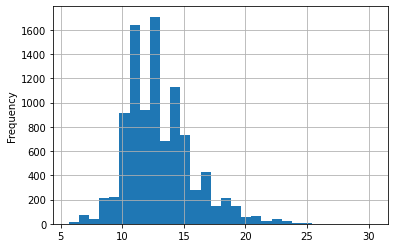

In [ ]:
#wind gust assign nan when no gust. units m/s
df["wind_gust_o"]=pd.to_numeric(df["gust"], downcast="float",errors='coerce')*0.514444 

df.loc[df.wind_gust_o<0,"wind_gust_o"]="M"
#mask = (df.time > '2011-08-01') & (df.time <= '2011-11-05') & (df.wind_gust_o<0)
#df.loc[mask,["wind_gust_o","metar_o","time"]].set_index("time")
df["wind_gust_o"]=df["wind_gust_o"].fillna("M")
print(df["wind_gust_o"].describe())

pd.to_numeric(df["wind_gust_o"],downcast="float",errors="coerce").plot(kind="hist",bins=30,grid=True);

df.wind_gust_o.sample(30)

In [ ]:
import plotly.express as px
fig = px.line(df,x="time",y="wind_gust_o", title="wind_gust_o figure")
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#One hour precipitation for the period from the observation time to the time of the previous hourly precipitation reset.
#This value may or may not contain frozen precipitation melted by some device on the sensor or estimated by some other means
#transformed from inches to mm
df["prec_o"]=pd.to_numeric(df["p01i"], downcast="float",errors='coerce')*25.4
print(df["prec_o"].describe())

import plotly.express as px
fig = px.line(df,x="time",y="prec_o", title="Var figure")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#QNH in hpa
df["mslp_o"]=round(pd.to_numeric(df["alti"], downcast="float",errors='coerce')*33.8638,0)
df.loc[df.mslp_o<900,"mslp_o"]=np.nan
df.loc[df.mslp_o>1100,"mslp_o"]=np.nan
print(df["mslp_o"].describe())
print(df.loc[df["time"]=="2013-01-19 06:30:00",["mslp_o","metar"]])
print(df[["mslp_o","metar"]])

import plotly.express as px
fig = px.line(df,x="time",y="mslp_o", title="mslp_o figure")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Sea Level Pressure in hPa . Unknown. Data are incompletely
pd.to_numeric(df["mslp"], downcast="float",errors='coerce').describe()


count    30121.000000
mean      1017.220886
std          7.230199
min        974.299988
25%       1014.200012
50%       1018.000000
75%       1021.299988
max       1037.699951
Name: mslp, dtype: float64

In [ ]:
#visibility in meters
df["visibility_o"]=round(pd.to_numeric(df["vsby"], downcast="float",errors='coerce')*1609.344,0)
df.loc[df.visibility_o<=0,"visibility_o"]=np.nan
df.loc[df.visibility_o>9999,"visibility_o"]=9999
print(df[["visibility_o","metar"]].sample(20))
print(df["visibility_o"].describe())
df.loc[df.visibility_o<=1000,["visibility_o"]].plot(kind="hist",grid=True,bins=20);
import plotly.express as px
fig = px.line(df,x="time",y="visibility_o", title="Var figure")
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#pd.to_numeric(df["skyl1"], downcast="float",errors='ignore').sample(100)
#df[["skyc1","skyl1","skyc2","skyl2","skyc3","skyl3","skyc4","skyl4","metar"]].sample(30)
df["skyc1_o"]=df["skyc1"]
df["skyc2_o"]=df["skyc2"]
df["skyc3_o"]=df["skyc3"]
df["skyl1_o"]=round(pd.to_numeric(df["skyl1"], downcast="float",errors='coerce')*0.3048,0)
df["skyl1_o"]=df.skyl1_o.fillna(-1)
df.loc[df.skyl1_o>2000,"skyl1_o"]=np.nan
df["skyl1_o"]=df["skyl1_o"].replace(-1,"M")
print(df[["skyl1_o","metar"]].describe())
print(df[["skyl1_o","metar"]].sample(30))
df["skyl2_o"]=round(pd.to_numeric(df["skyl2"], downcast="float",errors='coerce')*0.3048,0)
df["skyl2_o"]=df.skyl2_o.fillna("M")
print(df[["skyl2_o","metar"]].describe())
df["skyl3_o"]=round(pd.to_numeric(df["skyl3"], downcast="float",errors='coerce')*0.3048,0)
df["skyl3_o"]=df.skyl3_o.fillna("M")
print(df[["skyl3_o","metar"]].describe())
df["skyl4_o"]=round(pd.to_numeric(df["skyl4"], downcast="float",errors='coerce')*0.3048,0)
df["skyl4_o"]=df.skyl4_o.fillna("M")
print(df[["skyl4_o","metar"]].describe())

import plotly.express as px
fig = px.line(df,x="time",y="skyl4_o", title="Var figure")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#wxcodes
pd.options.display.max_rows=100000
df.wxcodes.value_counts(normalize=True).map(lambda n: '{:.2%}'.format(n))
df["wxcodes_o"]=df["wxcodes"]

In [ ]:
#metar
df["metar_o"]=df["metar"]

In [ ]:
#last review
print(df[['time','temp_o','tempd_o', 'rh_o', 'dir_o', 'spd_o', 'wind_gust_o','mslp_o',
       'visibility_o', 'skyc1_o', 'skyc2_o', 'skyc3_o', 'skyl1_o', 'skyl2_o',
       'skyl3_o', 'wxcodes_o', 'metar_o']].info())
df[['time','temp_o','tempd_o', 'rh_o', 'dir_o', 'spd_o', 'wind_gust_o','mslp_o',
       'visibility_o', 'skyc1_o', 'skyc2_o', 'skyc3_o', 'skyl1_o', 'skyl2_o',
       'skyl3_o', 'wxcodes_o', 'metar_o']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143860 entries, 0 to 143859
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   time          143860 non-null  datetime64[ns]
 1   temp_o        143855 non-null  float64       
 2   tempd_o       143856 non-null  float64       
 3   rh_o          143748 non-null  float32       
 4   dir_o         143860 non-null  float32       
 5   spd_o         143858 non-null  float64       
 6   wind_gust_o   143860 non-null  object        
 7   mslp_o        143853 non-null  float64       
 8   visibility_o  143854 non-null  float64       
 9   skyc1_o       143860 non-null  object        
 10  skyc2_o       143860 non-null  object        
 11  skyc3_o       143860 non-null  object        
 12  skyl1_o       143824 non-null  object        
 13  skyl2_o       143860 non-null  object        
 14  skyl3_o       143860 non-null  object        
 15  wxcodes_o     143

,temp_o,tempd_o,rh_o,dir_o,spd_o,mslp_o,visibility_o
count,143855.000000,143856.000000,143748.000000,143860.000000,143858.000000,143853.000000,143854.000000
mean,286.023164,282.789355,82.956909,130.097076,3.003292,1018.627467,8657.948038
std,5.727755,4.511201,16.379604,117.656647,2.097524,7.831051,2601.756446
min,269.150000,259.150000,14.400000,-1.000000,0.000000,975.000000,48.000000
25%,282.150000,279.150000,73.089996,10.000000,1.543332,1015.000000,8996.000000
50%,285.149999,283.150000,87.559998,110.000000,2.572220,1019.000000,9994.000000
75%,289.150000,286.150001,93.739998,230.000000,4.115552,1023.000000,9994.000000
max,312.149998,299.150002,100.000000,360.000000,15.947764,1044.000000,9994.000000


In [ ]:
df=df.drop_duplicates(subset="time")

In [ ]:
#save results
from google.colab import drive
drive.mount('/content/drive')
df[['time','temp_o','tempd_o', 'rh_o', 'dir_o', 'spd_o', 'wind_gust_o','mslp_o',
       'visibility_o', 'skyc1_o', 'skyc2_o', 'skyc3_o', 'skyl1_o', 'skyl2_o',
       'skyl3_o', 'wxcodes_o', 'metar_o']].to_csv("/content/drive/My Drive/Colab Notebooks/ML_database/met_stations/"+station+".csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=collections.Counter(df["wxcodes"])
data_sorted = {k: v for k, v in sorted(data.items(), key=lambda x: x[1])}
print(data_sorted)

NameError: ignored